In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = 'data/raw_data.csv'
dataset = pd.read_csv(path)
print('dataset 내 null 갯수 :',dataset.isnull().sum().sum())
dataset = dataset.drop('material', axis=1)
dataset

dataset 내 null 갯수 : 0


,b,h,d,d',L,l,a,fck,As,fy,...,G,CF,B,ff,Af,layer,Swr,Swf,Anchorage,Py
0,400,250,200.00,50,2400,2200,750,40.00,461.8,523.15,...,0,0,0,0,0.00,0,0.0,0.0,0,134.80
1,400,250,200.00,50,2400,2200,750,40.00,461.8,523.15,...,0,0,0,0,0.00,0,0.0,0.0,0,140.30
2,400,250,200.00,50,2400,2200,750,40.00,461.8,523.15,...,0,0,0,3051,31.96,2,10.0,10.0,0,160.00
3,400,250,200.00,50,2400,2200,750,40.00,461.8,523.15,...,0,0,0,3051,31.96,2,10.0,10.0,0,175.00
4,150,250,209.00,41,2400,2200,850,30.00,157.1,500.00,...,0,0,0,0,0.00,0,0.0,0.0,0,39.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,120,135,118.89,0,1500,1300,450,42.19,142.6,580.00,...,0,0,0,4900,2.77,1,10.0,10.0,0,36.49
96,120,135,118.89,0,1500,1300,450,42.19,142.6,580.00,...,0,0,0,4900,2.77,1,10.0,10.0,0,34.40
97,120,135,118.89,0,1500,1300,450,42.19,142.6,580.00,...,0,0,0,4900,8.32,3,10.0,10.0,0,40.44
98,120,135,118.89,0,1500,1300,450,42.19,142.6,580.00,...,0,0,0,4900,8.32,3,10.0,10.0,0,42.66


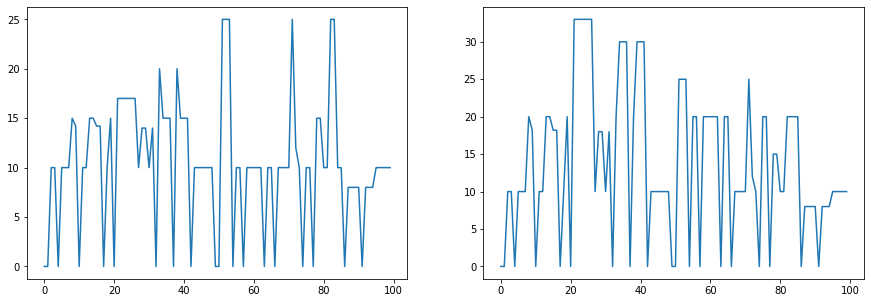

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(list(dataset.Swr))
plt.subplot(1,2,2)
plt.plot(list(dataset.Swf))

In [5]:
dataset.columns[:-1]

Index(['b', 'h', 'd', 'd'', 'L', 'l', 'a', 'fck', 'As', 'fy', 'As'', 'fy'',
       'C', 'PBO', 'G', 'CF', 'B', 'ff', 'Af', 'layer', 'Swr', 'Swf',
       'Anchorage'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def scaling(data, scaler):
    scaled = scaler.fit_transform(data)

    return scaled, scaler

features = dataset.drop('Py', axis=1)
labels = dataset['Py']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, shuffle=True, random_state=1)



idx = 1
scaler_list = [MinMaxScaler(), StandardScaler(), RobustScaler()]
scaler = scaler_list[idx]
# x_train, x_test 스케일링
train_scaled, scaler = scaling(x_train,scaler)
test_scaled = scaler.transform(x_test)
x_train = pd.DataFrame(train_scaled)
x_test  = pd.DataFrame(test_scaled)

# columns 이름이 다 소실되었으므로 복구
x_train.columns = dataset.drop('Py', axis=1).columns
x_test.columns = dataset.drop('Py', axis=1).columns

# 저장
name_list = ['minmax','standard', 'robust']
# x_train.to_csv('data/train/{}_data.csv'.format(name_list[idx]))
# y_train.to_csv('data/train/label.csv')
# x_test.to_csv('data/test/{}_data.csv'.format(name_list[idx]))
# y_test.to_csv('data/test/label.csv')

# 데이터 불러오기
x_train = pd.read_csv('data/train/{}_data.csv'.format(name_list[idx]), index_col=0)
y_train = pd.read_csv('data/train/label.csv', index_col=0)
x_test = pd.read_csv('data/test/{}_data.csv'.format(name_list[idx]),index_col=0)
y_test = pd.read_csv('data/test/label.csv', index_col=0)

x_train = torch.Tensor(np.array(x_train))
y_train = torch.Tensor(np.array(y_train))
x_test = torch.Tensor(np.array(x_test))
y_test = torch.Tensor(np.array(y_test))
    

## Training

### SVM

Support Vector Machine Regressor
MAE : 5.3526
RMSE = 7.9312
R^2 : 0.9003868546371364


/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


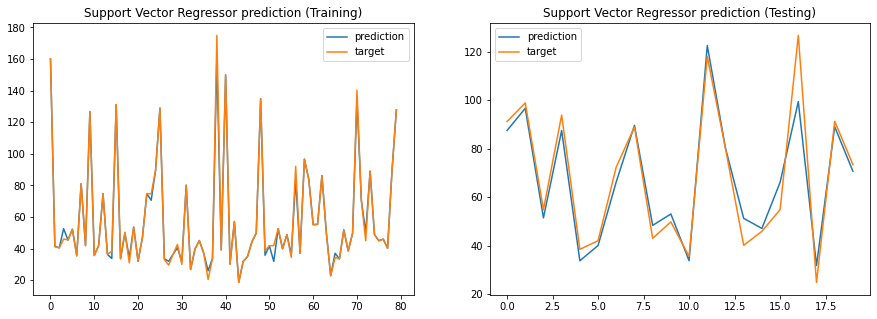

In [7]:
from sklearn import svm

model = svm.SVR(kernel='rbf', degree = 7, C=5000)
model.fit(x_train, y_train)

plt.figure(figsize=(15,5))
print('Support Vector Machine Regressor')
mae = torch.sum(torch.abs(torch.subtract(torch.Tensor(model.predict(x_test)),y_test.squeeze(dim=1))))/len(y_test)
rmse = torch.sqrt(torch.sum(torch.square(torch.subtract(torch.Tensor(model.predict(x_test)),y_test.squeeze(dim=1))))/len(y_test))
print('MAE :',format(mae,'.4f'))
print('RMSE =', format(rmse, '.4f'))
print('R^2 :',r2_score(model.predict(x_test),y_test))
plt.subplot(1,2,1)
plt.title('Support Vector Regressor prediction (Training)')
plt.plot(model.predict(x_train), label='prediction')
plt.plot(y_train, label='target')
plt.legend()

plt.subplot(1,2,2)
plt.title('Support Vector Regressor prediction (Testing)')
plt.plot(model.predict(x_test), label='prediction')
plt.plot(y_test, label='target')
plt.legend()

plt.show()

### KNN

K Nearest Neighbors
MAE : 595.9540
RMSE = 165.8566
R^2 : 0.501230954588147


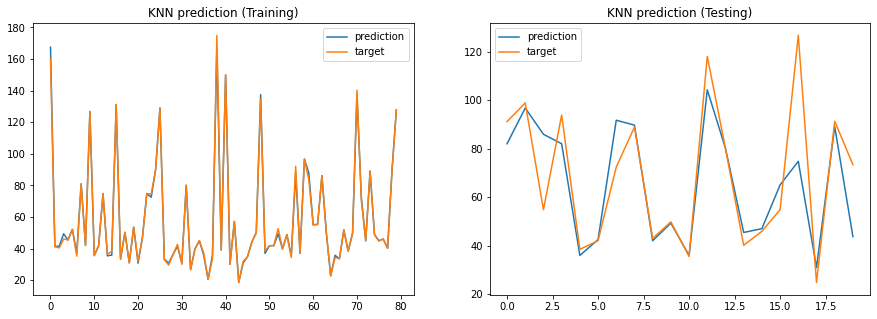

In [8]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(x_train, y_train)

plt.figure(figsize=(15,5))
print('K Nearest Neighbors')
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
mae = torch.sum(torch.abs((torch.Tensor(pred_test) - y_test.squeeze(dim=1))))/y_test.shape[0]
rmse = torch.sqrt(torch.sum(torch.square(torch.subtract(torch.Tensor(model.predict(x_test)),y_test.squeeze(dim=1))))/len(y_test))
print('MAE :',format(mae,'.4f'))
print('RMSE =', format(rmse, '.4f'))
print('R^2 :',r2_score(pred_test,y_test))

plt.subplot(1,2,1)
plt.title('KNN prediction (Training)')
plt.plot(pred_train, label='prediction')
plt.plot(y_train, label='target')
plt.legend()

plt.subplot(1,2,2)
plt.title('KNN prediction (Testing)')
plt.plot(pred_test, label='prediction')
plt.plot(y_test, label='target')
plt.legend()

plt.show()

### Decision Tree

Decision Tree
MAE : 5.2675
RMSE = 7.6977
R^2 : 0.9364681671677408


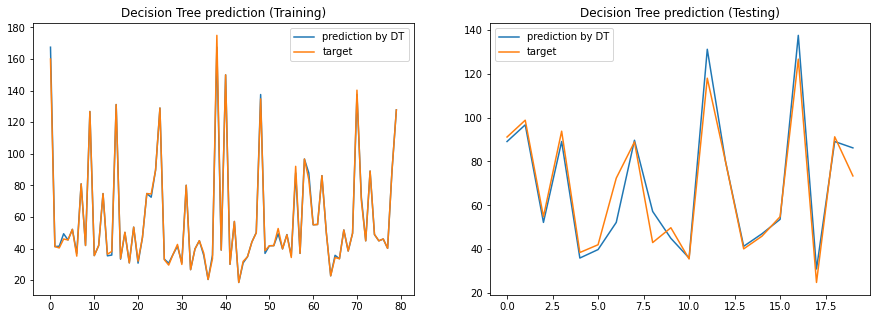

In [9]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

plt.figure(figsize=(15,5))
print('Decision Tree')
pred_train = regressor.predict(x_train)
pred_test = regressor.predict(x_test)
mae = torch.sum(torch.abs((torch.Tensor(pred_test) - y_test.squeeze(dim=1))))/y_test.shape[0]
rmse = torch.sqrt(torch.sum(torch.square(torch.subtract(torch.Tensor(regressor.predict(x_test)),y_test.squeeze(dim=1))))/len(y_test))
print('MAE :',format(mae,'.4f'))
print('RMSE =', format(rmse, '.4f'))
print('R^2 :',r2_score(pred_test,y_test))
plt.subplot(1,2,1)
plt.title('Decision Tree prediction (Training)')
plt.plot(pred_train, label = 'prediction by DT')
plt.plot(y_train, label='target')
plt.legend()

plt.subplot(1,2,2)
plt.title('Decision Tree prediction (Testing)')
plt.plot(pred_test, label = 'prediction by DT')
plt.plot(y_test, label='target')
plt.legend()

plt.show()

### Random Forest

/var/folders/zc/5b1gl8616ld1mkmyd4zbjxpc0000gn/T/ipykernel_87023/482605939.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Random Forest
MAE : 4.5208
RMSE = 6.1354
R^2 : 0.9497013804913125


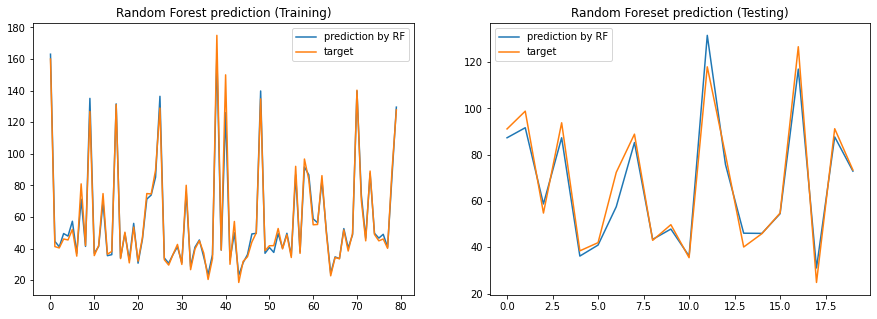

In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500)
model.fit(x_train, y_train)

print('Random Forest')
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
mae = torch.sum(torch.abs((torch.Tensor(pred_test) - y_test.squeeze(dim=1))))/y_test.shape[0]
rmse = torch.sqrt(torch.sum(torch.square(torch.subtract(torch.Tensor(model.predict(x_test)),y_test.squeeze(dim=1))))/len(y_test))
print('MAE :',format(mae,'.4f'))
print('RMSE =', format(rmse, '.4f'))
print('R^2 :',r2_score(pred_test,y_test))
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
pred = model.predict(x_train)
plt.title('Random Forest prediction (Training)')
plt.plot(pred, label = 'prediction by RF')
plt.plot(y_train, label='target')
plt.legend()

plt.subplot(1,2,2)
pred = model.predict(x_test)
plt.title('Random Foreset prediction (Testing)')
plt.plot(pred, label = 'prediction by RF')
plt.plot(y_test, label='target')
plt.legend()

plt.show()

xgboost
MAE : 4.0924
RMSE = 5.4941
R^2 : 0.9665395809833907


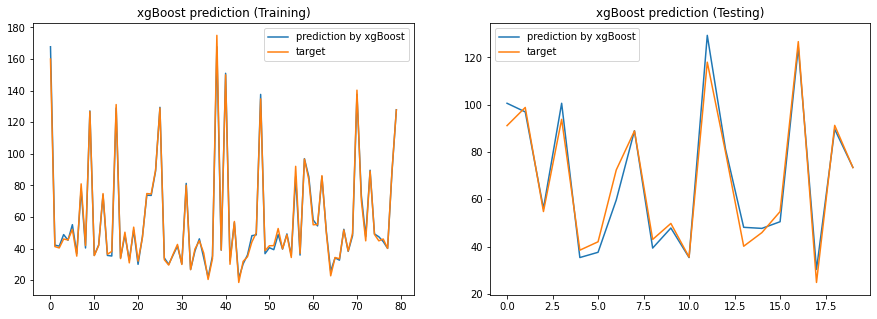

In [14]:
from xgboost import XGBRegressor

model = XGBRegressor(max_depth=2)
model.fit(x_train, y_train)

print('xgboost')
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
mae = torch.sum(torch.abs((torch.Tensor(pred_test) - y_test.squeeze(dim=1))))/y_test.shape[0]
rmse = torch.sqrt(torch.sum(torch.square(torch.subtract(torch.Tensor(model.predict(x_test)),y_test.squeeze(dim=1))))/len(y_test))
print('MAE :',format(mae,'.4f'))
print('RMSE =', format(rmse, '.4f'))
print('R^2 :',r2_score(pred_test,y_test))
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
pred = model.predict(x_train)
plt.title('xgBoost prediction (Training)')
plt.plot(pred, label = 'prediction by xgBoost')
plt.plot(y_train, label='target')
plt.legend()

plt.subplot(1,2,2)
pred = model.predict(x_test)
plt.title('xgBoost prediction (Testing)')
plt.plot(pred, label = 'prediction by xgBoost')
plt.plot(y_test, label='target')
plt.legend()

plt.show()

<BarContainer object of 23 artists>

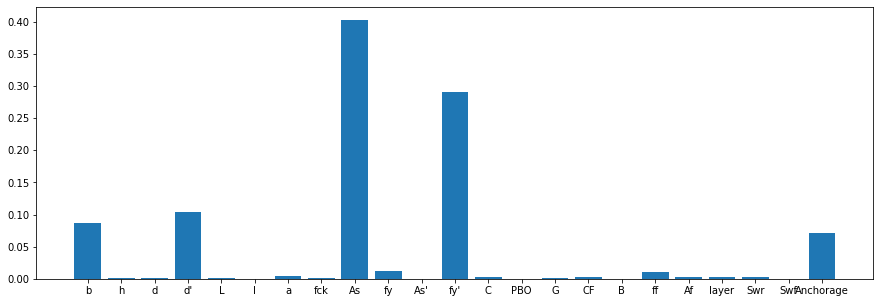

In [15]:
plt.figure(figsize=(15,5))
plt.bar(dataset.columns[:-1], model.feature_importances_)

 48%|████▊     | 120/250 [00:16<00:17,  7.32it/s]


Early stopping occurred at epoch 120 with best_epoch = 70 and best_valid_r2 = 0.8262
Best weights from best epoch are automatically used!

 tabnet_r2 = 0.8262


<BarContainer object of 23 artists>

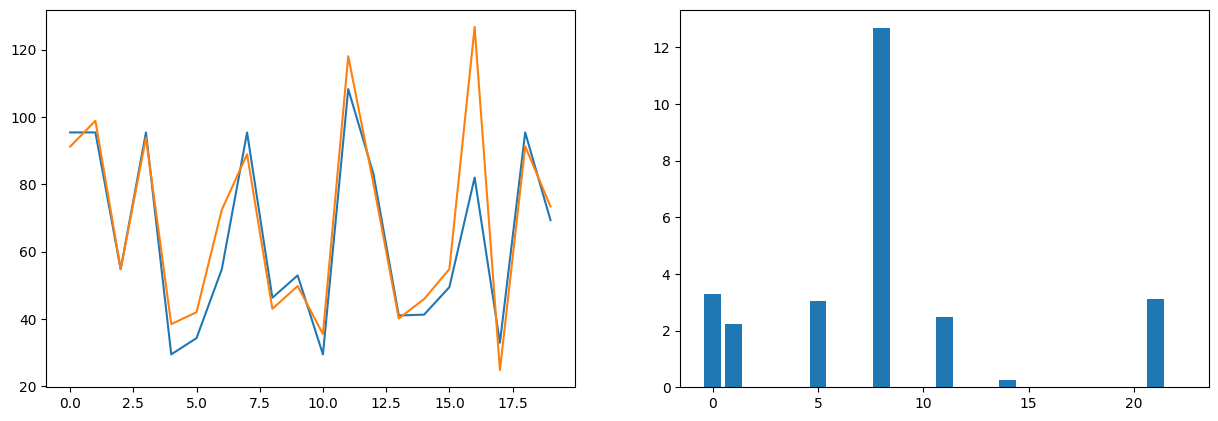

In [9]:
%load_ext autoreload
%autoreload 2

from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import r2_score

device = "cuda:0"

tabnet_x_train = np.array(x_train)
tabnet_y_train = np.array(y_train)
tabnet_x_test = np.array(x_test)
tabnet_y_test = np.array(y_test)




TabNet = TabNetRegressor(
    n_d=16, n_a=16, n_steps=3,
    gamma=1.3, n_independent=2, n_shared=2,
    cat_emb_dim=4,
    lambda_sparse=1e-4, momentum=0.02, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                    "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15,
    device_name=device, verbose=0
)

TabNet._default_metric = ('r2')

TabNet.fit(
    X_train=tabnet_x_train, y_train=tabnet_y_train,
    eval_set=[(tabnet_x_train, tabnet_y_train), (tabnet_x_test, tabnet_y_test)],
    eval_metric=['r2'],
    eval_name=['train', 'valid'],
    max_epochs=250, patience=50,
    batch_size=20, virtual_batch_size=20,
    drop_last=True
)
y_pred = TabNet.predict(tabnet_x_test)
tabnet_r2 = r2_score(tabnet_y_test, y_pred)
print("\n",f"tabnet_r2 = {tabnet_r2:.4f}")

plt.figure(figsize=(15,5), dpi=100)

plt.subplot(1,2,1)
plt.plot(y_pred)
plt.plot(tabnet_y_test)

plt.subplot(1,2,2)
explain_matrix, mask = TabNet.explain(tabnet_x_test)
plt.bar(range(explain_matrix.shape[1]),explain_matrix[5])